In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
with open("../data/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
len(labels)

26709

In [11]:
training_sentences = sentences[:20000]
testing_sentences = sentences[20000:]
training_labels = labels[:20000]
testing_labels = labels[20000:]
len(testing_labels)

6709

In [19]:
vocab_size = 10000

In [12]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
len(word_index)

25637

In [16]:
# preparing training sentences
training_seq = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_seq,maxlen=100,truncating='post',padding='post')
print(training_padded[0])

[ 328    1  799 3405 2404   47  389 2214    1    6 2614 8863    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [17]:
# preparing testing sentences
testing_seq = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_seq,maxlen=100,truncating='post',padding='post')
print(testing_padded[0])

[   1 1100 6663 9423   30    1 2439    5  519  109    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [18]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(training_padded,training_labels,validation_data=(testing_padded,testing_labels),epochs=30)

Epoch 1/30
625/625 [==============================] - 4s 6ms/step - loss: 0.6775 - accuracy: 0.5638 - val_loss: 0.6373 - val_accuracy: 0.5795
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 0.4691 - accuracy: 0.8094 - val_loss: 0.3933 - val_accuracy: 0.8350
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3225 - accuracy: 0.8700 - val_loss: 0.3573 - val_accuracy: 0.8474
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.2688 - accuracy: 0.8932 - val_loss: 0.3580 - val_accuracy: 0.8399
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.2320 - accuracy: 0.9097 - val_loss: 0.3408 - val_accuracy: 0.8569
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.2046 - accuracy: 0.9220 - val_loss: 0.3482 - val_accuracy: 0.8509
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1828 - accuracy: 0.9303 - val_loss: 0.3749 - val_accuracy: 0.8436
Epoch 

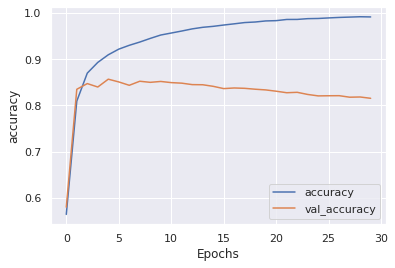

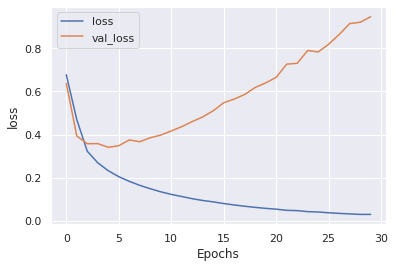

In [24]:
import matplotlib.pyplot as plt
import seaborn as sbs
sbs.set()


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [28]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#     tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 128)          41472     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 244,273
Trainable params: 244,273
Non-trainable params: 0
_________________________________________________________________


In [30]:
history2 = model2.fit(training_padded,training_labels,validation_data=(testing_padded,testing_labels),epochs=30)

Epoch 1/30
625/625 [==============================] - 79s 126ms/step - loss: 0.4057 - accuracy: 0.7996 - val_loss: 0.3339 - val_accuracy: 0.8530
Epoch 2/30
625/625 [==============================] - 73s 117ms/step - loss: 0.2048 - accuracy: 0.9194 - val_loss: 0.3440 - val_accuracy: 0.8574
Epoch 3/30
625/625 [==============================] - 81s 130ms/step - loss: 0.1154 - accuracy: 0.9588 - val_loss: 0.3975 - val_accuracy: 0.8486
Epoch 4/30
625/625 [==============================] - 79s 126ms/step - loss: 0.0725 - accuracy: 0.9745 - val_loss: 0.5236 - val_accuracy: 0.8417
Epoch 5/30
625/625 [==============================] - 78s 125ms/step - loss: 0.0453 - accuracy: 0.9851 - val_loss: 0.6008 - val_accuracy: 0.8445
Epoch 6/30
625/625 [==============================] - 79s 127ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.7158 - val_accuracy: 0.8383
Epoch 7/30
625/625 [==============================] - 80s 128ms/step - loss: 0.0247 - accuracy: 0.9919 - val_loss: 0.7084 - val_ac

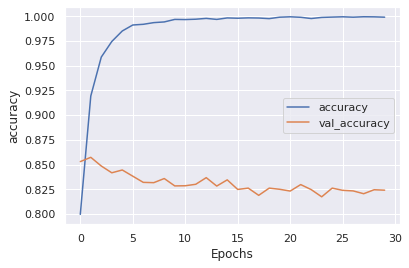

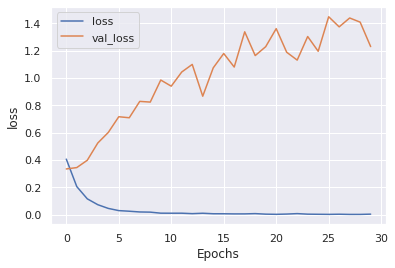

In [31]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")